In [62]:
from onetwogo import Params
from onetwogo.parallel_simulation import ParallelSimulation
from onetwogo.experiment_simulation import ExperimentSimulation
from onetwogo.plot import SimulationPlot
from onetwogo.plot import BehavioralPlot

import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pickle

import parameter_tuning as pt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
sns.set_style("ticks", {'font.family':'sans-serif', 
               'font.sans-serif':['CMU Serif'],
               'size': 11})

In [64]:
colors_short = [(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.7972318339100346, 0.20092272202998845, 0.3008073817762399, 1.0),
 (0.9139561707035756, 0.36239907727797, 0.27935409457900806, 1.0),
 (0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 (0.9966935793925413, 0.8975009611687812, 0.5770857362552863, 1.0),
 (1.0, 0.9803921568627451, 0.5529411764705883, 1.0)]

colors_long = [(1.0, 0.9803921568627451, 0.5529411764705883, 1.0),
 (0.9173394848135333, 0.9669357939254134, 0.6200692041522493, 1.0),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.5273356401384084, 0.8106113033448674, 0.6452133794694349, 1.0),
 (0.3280276816608997, 0.6805074971164936, 0.6802768166089965, 1.0),
 (0.2265282583621684, 0.4938869665513264, 0.7224913494809688, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

In [73]:
stimulus_lst_short = np.loadtxt('stimlst_short_400_700_7_a.txt', dtype=int)
stimulus_lst_long = np.loadtxt('stimlst_long_700_1000_7_a.txt', dtype=int)

stimulus_range_s = [400, 450, 500, 550, 600, 650, 700]
stimulus_range_l = [700, 750, 800, 850, 900, 950, 1000]

In [66]:
PARAMS_DICT = {'Wui': 6,
              'Wuv': 6,
              'Wvi': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.1,
              'IF': -500,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
              'Iinit': 1.02,
              'first_duration': 750, 
              'sigma': 0.01, 
              'ntrials': 500,
              'delay': 500}

# CV

In [67]:
sigma_lst = [0,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.05,0.06,0.07, 0.08, 0.09, 0.1, 0.15, 0.2, 0.25]

In [68]:
import matplotlib as mpl
jet = cm = plt.get_cmap('Blues') 
cNorm  = mpl.colors.Normalize(vmin=-5, vmax=len(sigma_lst)-1)
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=jet)

colors = []
for i in range(len(sigma_lst)):
    colors.append(scalarMap.to_rgba(i))

In [69]:
K = 6

stds_s_mean = []
for sigma in sigma_lst:
    stds_si = []
    for i in range(11):
        params = Params(ntrials=500, delay=700, tau=70, sigma=sigma, th=0.1, Iinit=1.02, IF=-500)
        expsim = ExperimentSimulation(params)
        exp_result = expsim.simulate(stimulus_lst_short, K)
        beh_result = exp_result.create_behavioral_data()
        stds_si.append(beh_result.production_stds)
    stds_s_mean.append(np.mean(stds_si, axis=0))

In [70]:
K = 4
stds_l_mean = []

for sigma in sigma_lst:
    stds_li = []
    for i in range(11):
        params = Params(ntrials=500, delay=700, tau=70, sigma=sigma, th=0.1, Iinit=1.02, IF=-500)
        expsim = ExperimentSimulation(params)
        exp_result = expsim.simulate(stimulus_lst_long, K)
        beh_result = exp_result.create_behavioral_data()
        stds_li.append(beh_result.production_stds)
    stds_l_mean.append(np.mean(stds_li, axis=0))

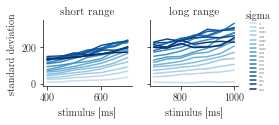

In [75]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(3.5,1.2))
ax[0].set_prop_cycle(color=colors)
ax[1].set_prop_cycle(color=colors)

for lst, sigma in zip(stds_s_mean, sigma_lst):
    ax[0].plot(stimulus_range_s, lst, label=str(sigma))
ax[0].set_title('short range', fontsize=11)
ax[0].set_ylabel('standard deviation')
ax[0].set_xlabel('stimulus [ms]')
ax[1].set_xlabel('stimulus [ms]')

for lst, sigma in zip(stds_l_mean, sigma_lst):
    ax[1].plot(stimulus_range_l, lst, label=str(sigma))
ax[1].set_title('long range', fontsize=11)

for i in [0,1]:
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

ax[1].legend(bbox_to_anchor=(1.05, 1.2), title='sigma', frameon=False,  prop={'size': 3.4})
plt.savefig('../report/figures/highI_dyn/std.svg', dpi=500, bbox_inches='tight')

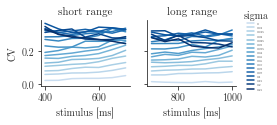

In [77]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(3.5,1.2))
ax[0].set_prop_cycle(color=colors)
ax[1].set_prop_cycle(color=colors)

for lst, sigma in zip(np.array(stds_s_mean)/np.array(stimulus_range_s), sigma_lst):
    ax[0].plot(stimulus_range_s, lst, label=str(sigma))
ax[0].set_title('short range', fontsize=11)
ax[0].set_ylabel('CV')
ax[0].set_xlabel('stimulus [ms]')
ax[1].set_xlabel('stimulus [ms]')

for lst, sigma in zip(np.array(stds_l_mean)/np.array(stimulus_range_l), sigma_lst):
    ax[1].plot(stimulus_range_l, lst, label=str(sigma))
ax[1].set_title('long range', fontsize=11)

for i in [0,1]:
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

ax[1].legend(bbox_to_anchor=(1.05, 1.2), title='sigma', frameon=False,  prop={'size': 3.4})
plt.savefig('../report/figures/highI_dyn/CV.svg', dpi=500, bbox_inches='tight')

In [97]:
np.mean(np.array(stds_s_mean)/np.array(stimulus_range_s), axis=1)

array([0.03231756, 0.07233498, 0.10175477, 0.12902306, 0.1560583 ,
       0.18569901, 0.20691687, 0.23060062, 0.26061123, 0.28955208,
       0.30873402, 0.32615604, 0.32956567, 0.34215565, 0.32900818,
       0.28964721, 0.27711118])

In [98]:
np.mean(np.array(stds_l_mean)/np.array(stimulus_range_l), axis=1)

array([0.00961666, 0.06200795, 0.09030722, 0.11544446, 0.14391573,
       0.16667739, 0.19039589, 0.20511297, 0.24091831, 0.26427625,
       0.28494772, 0.29048722, 0.30042289, 0.30503873, 0.29233575,
       0.26544002, 0.23942923])

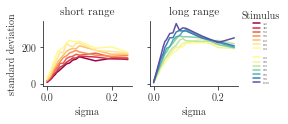

In [78]:
fig, ax = plt.subplots(1,2, sharey=True, sharex=True, figsize=(3.5,1.2))
ax[0].set_prop_cycle(color=colors_short)
ax[1].set_prop_cycle(color=colors_long)

for lst, stimulus in zip(np.array(stds_s_mean).T, stimulus_range_s):
    ax[0].plot(sigma_lst, lst, label=str(stimulus))
ax[0].set_title('short range', fontsize=11)
ax[0].set_ylabel('standard deviation')
ax[0].set_xlabel('sigma')
ax[1].set_xlabel('sigma')

for lst, stimulus in zip(np.array(stds_l_mean).T, stimulus_range_l):
    ax[1].plot(sigma_lst, lst, label=str(stimulus))
ax[1].set_title('long range', fontsize=11)

for i in [0,1]:
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

ax[1].legend(bbox_to_anchor=(1.384, 0.5), frameon=False,  prop={'size': 3.4})
ax[0].legend(bbox_to_anchor=(2.7, 1.2), title='Stimulus',frameon=False,  prop={'size': 3.4})
plt.savefig('../report/figures/highI_dyn/std_stim.svg', dpi=500, bbox_inches='tight')

# Parameter Space (K 1-18, sigma = 0.02)

In [79]:
K_lst = np.arange(1, 18, .5)
tau = np.arange(20, 150, 10)

print(len(K_lst), len(tau))

34 13


In [80]:
path = '../results/highI/'
short_ktau005, long_ktau005 = pt.load_data(path+'SHORT_K1-18_TAU_th005_del700_sig02_fixed_seed-20220728-142415-output.pickle',
                                      path+'LONG_K1-18_TAU_th005_del700_sig02_fixed_seed-20220728-144322-output.pickle')
short_ktau01, long_ktau01 = pt.load_data(path+'SHORT_K1-18_TAU_th01_del700_sig02_fixed_seed-20220728-163715-output.pickle',
                                      path+'LONG_K1-18_TAU_th01_del700_sig02_fixed_seed-20220728-151344-output.pickle')
short_ktau02, long_ktau02 = pt.load_data(path+'SHORT_K1-18_TAU_th02_del700_sig02_fixed_seed-20220728-170122-output.pickle',
                                      path+'LONG_K1-18_TAU_th02_del700_sig02_fixed_seed-20220728-172135-output.pickle')

threshold 0.05
-16062.114671099318 19933.32759783507
threshold 0.1
-211918.12565901506 11980.539788417032
threshold 0.2
-2310.984768009957 37855.45275679445


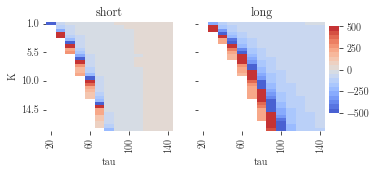

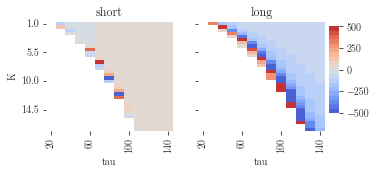

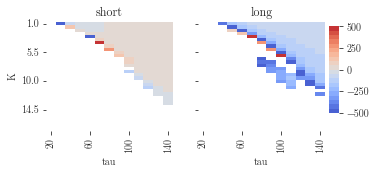

In [18]:
print('threshold', 0.05)
pt.plot_ind_point(short_ktau005, long_ktau005, K_lst, tau)
print('threshold', 0.1)
pt.plot_ind_point(short_ktau01, long_ktau01, K_lst, tau)
print('threshold', 0.2)
pt.plot_ind_point(short_ktau02, long_ktau02, K_lst, tau)

# SLOPE

threshold 0.05
-0.31273330983522435 1.4094318275868232
threshold 0.1
-0.444941519017606 1.5427807155504356
threshold 0.2
-0.5397404690351062 1.3630887522191868


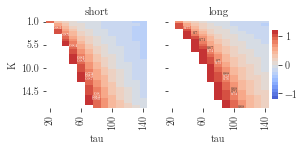

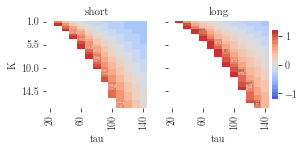

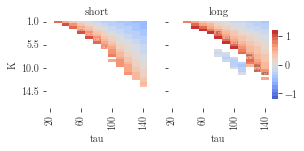

In [82]:
print('threshold', 0.05)
pt.plot_slope_behavior(short_ktau005, long_ktau005, K_lst, tau)
plt.savefig('../report/figures/highI_params/slope05.svg', dpi=500, bbox_inches='tight')
print('threshold', 0.1)
pt.plot_slope_behavior(short_ktau01, long_ktau01, K_lst, tau)
plt.savefig('../report/figures/highI_params/slope1.svg', dpi=500, bbox_inches='tight')
print('threshold', 0.2)
pt.plot_slope_behavior(short_ktau02, long_ktau02, K_lst, tau)
plt.savefig('../report/figures/highI_params/slope2.svg', dpi=500, bbox_inches='tight')

# MSE = BIAS2 + VAR

threshold 0.05
7065.546650319062 88082.70788263602
80 13.0
[(20, 1.0), (30, 1.5), (40, 3.0), (50, 4.5), (60, 6.5), (70, 9.5), (80, 13.0), (90, 17.0), (100, 17.5), (110, 17.5), (120, 17.5), (130, 17.5), (140, 17.0)]
60 4.0
[(20, 1.0), (30, 1.0), (40, 1.5), (50, 2.5), (60, 4.0), (70, 6.0), (80, 8.0), (90, 10.5), (100, 13.5), (110, 16.5), (120, 17.5), (130, 17.5), (140, 17.5)]
short
['2.0,30' '3.5,40' '5.5,50' '8.0,60' '8.5,60' '11.0,70' '11.5,70'
 '12.0,70' '15.0,80' '15.5,80' '16.0,80']
long
['2.0,40' '3.0,50' '4.5,60' '6.0,70' '6.5,70' '8.5,80' '9.0,80' '11.0,90'
 '11.5,90' '12.0,90' '14.0,100' '14.5,100' '15.0,100' '17.5,110']


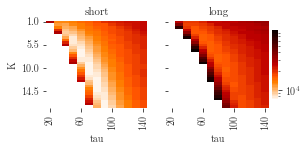

In [84]:
print('threshold', 0.05)
pt.plot_mse(short_ktau005, long_ktau005, K_lst, tau)
print(pt.get_opt_K(short_ktau005, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau005, K_lst, tau, mse=True))
pt.parameter_behavioural_plausible(short_ktau005, long_ktau005, K_lst, tau)
plt.savefig('../report/figures/highI_params/mse05.svg', dpi=500, bbox_inches='tight')

timeouts: [(400, 0.0), (450, 0.0), (500, 0.0), (550, 0.0), (600, 0.0), (650, 0.0), (700, 0.0)]
0.6772610153028712
timeouts: [(700, 0.0), (750, 0.0), (800, 0.0), (850, 0.0), (900, 0.0), (950, 0.0), (1000, 0.0)]
0.6529563052654028


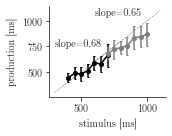

In [86]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=80, sigma=0.02, th=0.05, Iinit=1.02, IF=-500)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.5,2))

K = 13
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

np.random.seed(0)
K = 8
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='stimulus [ms]', ylabel='production [ms]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()
plt.savefig('../report/figures/highI_params/mse05_beh80.svg', dpi=500, bbox_inches='tight')

timeouts: [(400, 0.0), (450, 0.0), (500, 0.0), (550, 0.0), (600, 0.0), (650, 0.0), (700, 0.0)]
0.7933835866100397
timeouts: [(700, 0.0), (750, 0.0), (800, 0.0), (850, 0.0), (900, 0.0), (950, 0.0), (1000, 0.0)]
0.6725619631465446


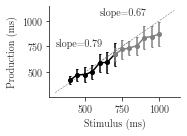

In [28]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=70, sigma=0.02, th=0.05, Iinit=1.02, IF=-500)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.5,2))

K = 11
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

np.random.seed(0)
K = 6
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='Stimulus (ms)', ylabel='Production (ms)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()

threshold 0.1
6119.784776022608 81508.8438153383
60 4.0
[(20, 1.0), (30, 1.0), (40, 1.5), (50, 2.5), (60, 4.0), (70, 5.0), (80, 6.5), (90, 9.0), (100, 11.0), (110, 12.5), (120, 15.5), (130, 16.5), (140, 16.5)]
60 2.5
[(20, 1.0), (30, 1.0), (40, 1.0), (50, 1.5), (60, 2.5), (70, 3.5), (80, 5.0), (90, 6.5), (100, 8.0), (110, 8.5), (120, 12.0), (130, 11.5), (140, 15.0)]
short
['3.0,50' '4.5,60' '6.0,70' '8.0,80' '8.5,80' '10.5,90' '11.0,90'
 '13.5,100' '14.0,100' '17.0,110' '17.5,110']
long
['2.5,60' '5.0,80' '6.5,90' '8.5,100' '10.5,110' '11.0,110' '13.0,120'
 '13.5,120' '14.0,120' '16.5,130' '17.0,130']


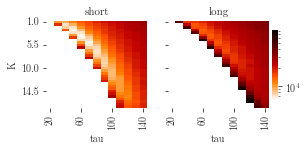

In [90]:
print('threshold', 0.1)
pt.plot_mse(short_ktau01, long_ktau01, K_lst, tau)
print(pt.get_opt_K(short_ktau01, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau01, K_lst, tau, mse=True))
pt.parameter_behavioural_plausible(short_ktau01, long_ktau01, K_lst, tau)
plt.savefig('../report/figures/highI_params/mse1.svg', dpi=500, bbox_inches='tight')

timeouts: [(400, 0.0), (450, 0.0), (500, 0.0), (550, 0.0), (600, 0.0), (650, 0.0), (700, 0.0)]
0.7435234052290461
timeouts: [(700, 0.0), (750, 0.0), (800, 0.0), (850, 0.0), (900, 0.0), (950, 0.0), (1000, 0.0)]
0.6789721986433714


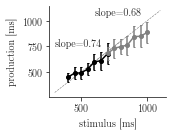

In [91]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=60, sigma=0.02, th=0.1, Iinit=1.02, IF=-500)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.5,2))

K = 4
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

np.random.seed(0)
K = 2.5
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='stimulus [ms]', ylabel='production [ms]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()
plt.savefig('../report/figures/highI_params/mse1_beh60.svg', dpi=500, bbox_inches='tight')

threshold 0.2
8376.158655624911 282949.6635435075
60 2.0
[(20, 1.0), (30, 1.0), (40, 1.0), (50, 1.5), (60, 2.0), (70, 3.0), (80, 3.5), (90, 4.5), (100, 6.0), (110, 7.0), (120, 7.5), (130, 8.0), (140, 8.5)]
80 3.0
[(20, 1.0), (30, 1.0), (40, 1.0), (50, 1.0), (60, 1.5), (70, 2.0), (80, 3.0), (90, 4.0), (100, 5.0), (110, 6.0), (120, 6.5), (130, 6.5), (140, 8.5)]
short
['2.5,60' '3.5,70' '4.5,80' '6.0,90']
long
['3.0,80' '4.0,90' '5.0,100' '7.5,120' '8.0,120' '9.5,130' '10.0,130'
 '10.5,130' '11.0,140']


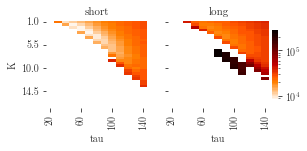

In [92]:
print('threshold', 0.2)
pt.plot_mse(short_ktau02, long_ktau02, K_lst, tau)
print(pt.get_opt_K(short_ktau02, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau02, K_lst, tau, mse=True))
pt.parameter_behavioural_plausible(short_ktau02, long_ktau02, K_lst, tau)
plt.savefig('../report/figures/highI_params/mse2.svg', dpi=500, bbox_inches='tight')

timeouts: [(400, 0.0), (450, 0.0), (500, 0.0), (550, 0.0), (600, 0.0), (650, 0.0), (700, 0.0)]
0.6236449065697234
timeouts: [(700, 0.0), (750, 0.0), (800, 0.0), (850, 0.0), (900, 0.0), (950, 0.0), (1000, 0.0)]
0.5468865458799695


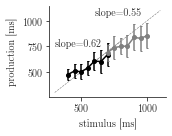

In [93]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=70, sigma=0.02, th=0.2, Iinit=1.02, IF=-500)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.5,2))

K = 3
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

np.random.seed(0)
K = 2
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='stimulus [ms]', ylabel='production [ms]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()
plt.savefig('../report/figures/highI_params/mse2_beh70.svg', dpi=500, bbox_inches='tight')

timeouts: [(400, 0.0), (450, 0.0), (500, 0.0), (550, 0.0), (600, 0.01), (650, 0.0), (700, 0.0)]
0.7998458612041958
timeouts: [(700, 0.0), (750, 0.0), (800, 0.0), (850, 0.0), (900, 0.0), (950, 0.0), (1000, 0.0)]
0.6967620865246001


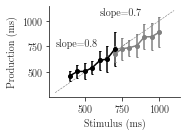

In [39]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=80, sigma=0.02, th=0.2, Iinit=1.02, IF=-500)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.7,2))

K = 4.5
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

np.random.seed(0)
K = 3
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='Stimulus (ms)', ylabel='Production (ms)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()
#plt.savefig('../report/figures/highI/mse2_beh70.png', dpi=500, bbox_inches='tight')

# BIAS2

threshold 0.05
624.4563516807353 20257.692849902985
80 17.5
[(20, 1.0), (30, 2.5), (40, 4.5), (50, 6.5), (60, 9.5), (70, 13.5), (80, 17.5), (90, 17.5), (100, 17.5), (110, 17.5), (120, 17.5), (130, 17.5), (140, 17.5)]
60 6.0
[(20, 1.0), (30, 1.5), (40, 3.5), (50, 4.0), (60, 6.0), (70, 8.0), (80, 10.5), (90, 15.0), (100, 17.5), (110, 17.5), (120, 17.5), (130, 17.5), (140, 17.5)]


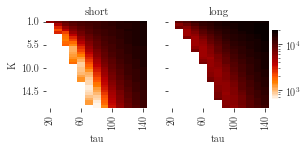

In [94]:
print('threshold', 0.05)
pt.plot_mse(short_ktau005, long_ktau005, K_lst, tau, 'bias2')
print(pt.get_opt_K(short_ktau005, K_lst, tau, bias2=True))
print(pt.get_opt_K(long_ktau005, K_lst, tau, bias2=True))
plt.savefig('../report/figures/highI_params/biassquar05.svg', dpi=500, bbox_inches='tight')

timeouts: [(400, 0.0), (450, 0.0), (500, 0.0), (550, 0.0), (600, 0.0), (650, 0.0), (700, 0.0)]
0.9776931297294928
timeouts: [(700, 0.0), (750, 0.0), (800, 0.0), (850, 0.0), (900, 0.0), (950, 0.0), (1000, 0.0)]
0.9611198135914979


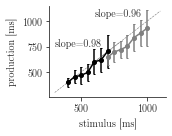

In [95]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=70, sigma=0.02, th=0.05, Iinit=1.02, IF=-500)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.5,2))

K = 13.5
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

np.random.seed(0)
K = 8
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='stimulus [ms]', ylabel='production [ms]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()
plt.savefig('../report/figures/highI_params/biassquar05_beh70.svg', dpi=500, bbox_inches='tight')

threshold 0.1
307.3946334127833 25685.642668975277
50 3.5
[(20, 1.0), (30, 1.5), (40, 2.0), (50, 3.5), (60, 5.0), (70, 7.0), (80, 9.0), (90, 12.5), (100, 14.5), (110, 17.0), (120, 17.5), (130, 17.5), (140, 17.5)]
50 2.5
[(20, 1.0), (30, 1.0), (40, 1.5), (50, 2.5), (60, 4.0), (70, 5.0), (80, 7.0), (90, 9.0), (100, 9.5), (110, 12.0), (120, 14.0), (130, 14.5), (140, 16.0)]


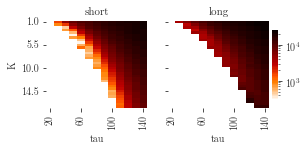

In [96]:
print('threshold', 0.1)
pt.plot_mse(short_ktau01, long_ktau01, K_lst, tau, 'bias2')
print(pt.get_opt_K(short_ktau01, K_lst, tau, bias2=True))
print(pt.get_opt_K(long_ktau01, K_lst, tau, bias2=True))
plt.savefig('../report/figures/highI_params/biassquar1.svg', dpi=500, bbox_inches='tight')

timeouts: [(400, 0.0), (450, 0.0), (500, 0.0), (550, 0.0), (600, 0.01), (650, 0.0), (700, 0.0)]
0.9896327137458144
timeouts: [(700, 0.0), (750, 0.0), (800, 0.0), (850, 0.0), (900, 0.0), (950, 0.0), (1000, 0.01)]
1.2848138685022135


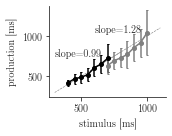

In [97]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=60, sigma=0.02, th=0.1, Iinit=1.02, IF=-500)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.5,2))

K = 5
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

np.random.seed(0)
K = 4
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='stimulus [ms]', ylabel='production [ms]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()
plt.savefig('../report/figures/highI_params/biassquar1_beh60.svg', dpi=500, bbox_inches='tight')

threshold 0.2
400.5601805955775 272986.91373122303
50 2.0
[(20, 1.0), (30, 1.0), (40, 1.5), (50, 2.0), (60, 3.0), (70, 3.5), (80, 5.0), (90, 6.0), (100, 7.5), (110, 9.0), (120, 10.0), (130, 11.0), (140, 13.0)]
50 2.0
[(20, 1.0), (30, 1.0), (40, 1.0), (50, 2.0), (60, 2.5), (70, 3.0), (80, 4.0), (90, 5.0), (100, 6.0), (110, 7.0), (120, 7.5), (130, 9.0), (140, 10.5)]


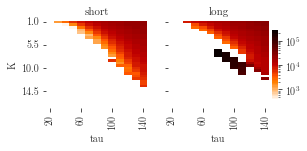

In [98]:
print('threshold', 0.2)
pt.plot_mse(short_ktau02, long_ktau02, K_lst, tau, 'bias2')
print(pt.get_opt_K(short_ktau02, K_lst, tau, bias2=True))
print(pt.get_opt_K(long_ktau02, K_lst, tau, bias2=True))
plt.savefig('../report/figures/highI_params/biassquar2.svg', dpi=500, bbox_inches='tight')

timeouts: [(400, 0.0), (450, 0.0), (500, 0.0), (550, 0.0), (600, 0.0), (650, 0.0), (700, 0.0)]
0.8208785504377418
timeouts: [(700, 0.0), (750, 0.0), (800, 0.0), (850, 0.0), (900, 0.0), (950, 0.0), (1000, 0.01)]
1.08663961899256


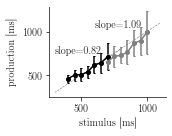

In [99]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=70, sigma=0.02, th=0.2, Iinit=1.02, IF=-500)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.5,2))

K = 3.5
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

np.random.seed(0)
K = 3
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='stimulus [ms]', ylabel='production [ms]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()
plt.savefig('../report/figures/highI_params/biassquar2_beh70.svg', dpi=500, bbox_inches='tight')

# VAR

threshold 0.05
3260.6949577821356 81152.44955633975
60 1.5
[(20, 1.0), (30, 1.0), (40, 1.0), (50, 1.0), (60, 1.5), (70, 2.0), (80, 2.5), (90, 4.0), (100, 4.5), (110, 6.0), (120, 6.5), (130, 7.5), (140, 4.5)]
70 2.0
[(20, 1.0), (30, 1.0), (40, 1.0), (50, 1.0), (60, 1.5), (70, 2.0), (80, 3.0), (90, 3.5), (100, 3.5), (110, 5.0), (120, 6.5), (130, 7.0), (140, 4.5)]


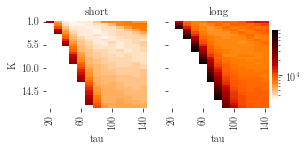

In [100]:
print('threshold', 0.05)
pt.plot_mse(short_ktau005, long_ktau005, K_lst, tau, 'var')
print(pt.get_opt_K(short_ktau005, K_lst, tau, var=True))
print(pt.get_opt_K(long_ktau005, K_lst, tau, var=True))
plt.savefig('../report/figures/highI_params/var05.svg', dpi=500, bbox_inches='tight')

threshold 0.1
3315.0463643642174 64819.765650876165
70 1.0
[(20, 1.0), (30, 1.0), (40, 1.0), (50, 1.0), (60, 1.0), (70, 1.0), (80, 1.5), (90, 1.5), (100, 2.0), (110, 1.5), (120, 3.5), (130, 3.5), (140, 2.5)]
70 1.0
[(20, 1.0), (30, 1.0), (40, 1.0), (50, 1.0), (60, 1.0), (70, 1.0), (80, 1.5), (90, 1.5), (100, 2.5), (110, 3.0), (120, 3.5), (130, 1.5), (140, 2.0)]


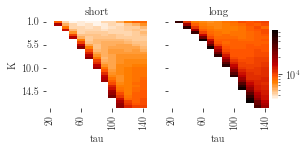

In [101]:
print('threshold', 0.1)
pt.plot_mse(short_ktau01, long_ktau01, K_lst, tau, 'var')
print(pt.get_opt_K(short_ktau01, K_lst, tau, var=True))
print(pt.get_opt_K(long_ktau01, K_lst, tau, var=True))
plt.savefig('../report/figures/highI_params/var1.svg', dpi=500, bbox_inches='tight')

threshold 0.2
3820.190475581655 85000.46236831292
100 1.0
[(20, 1.0), (30, 1.0), (40, 1.0), (50, 1.0), (60, 1.0), (70, 1.0), (80, 1.0), (90, 1.0), (100, 1.0), (110, 1.0), (120, 1.0), (130, 1.0), (140, 1.0)]
80 6.5
[(20, 1.0), (30, 1.0), (40, 1.0), (50, 1.0), (60, 1.0), (70, 1.0), (80, 6.5), (90, 1.0), (100, 1.0), (110, 1.0), (120, 1.0), (130, 1.0), (140, 1.0)]


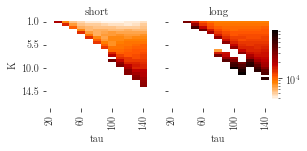

In [102]:
print('threshold', 0.2)
pt.plot_mse(short_ktau02, long_ktau02, K_lst, tau, 'var')
print(pt.get_opt_K(short_ktau02, K_lst, tau, var=True))
print(pt.get_opt_K(long_ktau02, K_lst, tau, var=True))
plt.savefig('../report/figures/highI_params/var2.svg', dpi=500, bbox_inches='tight')

# BIAS

threshold 0.05
-86.78400623982978 27.57627816691791
110 7.5
[(20, 1.0), (30, 2.5), (40, 5.0), (50, 6.0), (60, 1.0), (70, 1.0), (80, 1.0), (90, 1.0), (100, 2.0), (110, 7.5), (120, 16.0), (130, 17.0), (140, 16.0)]
130 1.0
[(20, 1.0), (30, 1.5), (40, 3.5), (50, 5.5), (60, 8.0), (70, 1.0), (80, 1.0), (90, 1.0), (100, 1.0), (110, 1.0), (120, 1.0), (130, 1.0), (140, 1.0)]


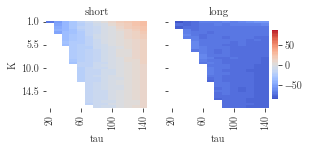

In [103]:
print('threshold', 0.05)
pt.plot_mse(short_ktau005, long_ktau005, K_lst, tau, 'bias')
print(pt.get_opt_K(short_ktau005, K_lst, tau, bias=True))
print(pt.get_opt_K(long_ktau005, K_lst, tau, bias=True))
plt.savefig('../report/figures/highI_params/bias05.svg', dpi=500, bbox_inches='tight')

threshold 0.1
-126.61182541770417 36.82388311610604
70 2.5
[(20, 1.0), (30, 1.5), (40, 2.5), (50, 3.5), (60, 4.0), (70, 2.5), (80, 4.0), (90, 12.5), (100, 15.0), (110, 17.0), (120, 17.5), (130, 17.5), (140, 17.5)]
60 4.5
[(20, 1.0), (30, 1.0), (40, 2.0), (50, 3.0), (60, 4.5), (70, 6.0), (80, 7.5), (90, 9.0), (100, 1.0), (110, 1.0), (120, 1.0), (130, 1.0), (140, 1.0)]


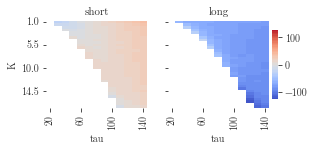

In [104]:
print('threshold', 0.1)
pt.plot_mse(short_ktau01, long_ktau01, K_lst, tau, 'bias')
print(pt.get_opt_K(short_ktau01, K_lst, tau, bias=True))
print(pt.get_opt_K(long_ktau01, K_lst, tau, bias=True))
plt.savefig('../report/figures/highI_params/bias1.svg', dpi=500, bbox_inches='tight')

threshold 0.2
-510.9443377017384 27.800055871530805
70 2.0
[(20, 1.0), (30, 1.0), (40, 1.5), (50, 2.0), (60, 2.0), (70, 2.0), (80, 1.0), (90, 1.0), (100, 2.5), (110, 8.5), (120, 10.0), (130, 10.5), (140, 12.0)]
50 2.0
[(20, 1.0), (30, 1.0), (40, 1.0), (50, 2.0), (60, 2.5), (70, 3.0), (80, 4.0), (90, 5.0), (100, 6.0), (110, 6.5), (120, 7.5), (130, 6.5), (140, 4.0)]


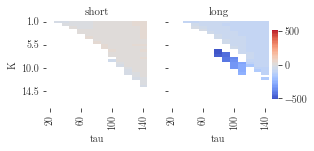

In [105]:
print('threshold', 0.2)
pt.plot_mse(short_ktau02, long_ktau02, K_lst, tau, 'bias')
print(pt.get_opt_K(short_ktau02, K_lst, tau, bias=True))
print(pt.get_opt_K(long_ktau02, K_lst, tau, bias=True))
plt.savefig('../report/figures/highI_params/bias2.svg', dpi=500, bbox_inches='tight')

threshold 0.05
252633.75050709938 605720.408
threshold 0.1
249276.46232179226 610671.1739130435
threshold 0.2
248655.1724137931 672647.2397540984


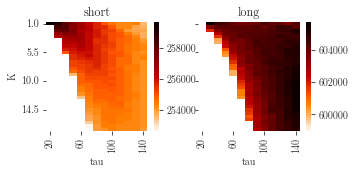

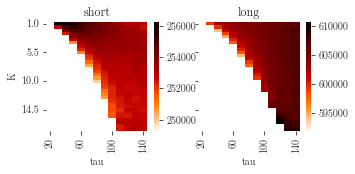

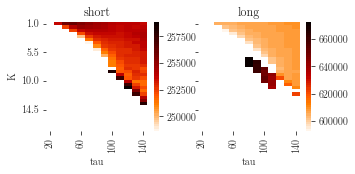

In [53]:
print('threshold', 0.05)
pt.plot_mse_total(short_ktau005, long_ktau005, K_lst, tau)
print('threshold', 0.1)
pt.plot_mse_total(short_ktau01, long_ktau01, K_lst, tau)
print('threshold', 0.2)
pt.plot_mse_total(short_ktau02, long_ktau02, K_lst, tau)

# Initialization

In [106]:
seed = np.arange(0, 21, 1)
K_lst = np.arange(1, 18, 0.5)

In [107]:
path = '../results/highI/'
short_ktau01_seed, long_ktau01_seed = pt.load_data(
    path+'SHORT_K1-18_TAU60_th07_del700_sig02_seed-20220731-210109-output.pickle',
    path+'LONG_K1-18_TAU60_th07_del700_sig02_seed-20220731-211550-output.pickle')

-0.8072701994216527 1.6435842929112816


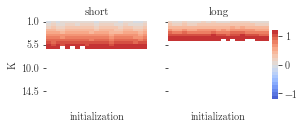

In [109]:
pt.plot_slope(short_ktau01_seed, long_ktau01_seed, K_lst, seed)
plt.savefig('../report/figures/highI_params/slope1_seed60.svg', dpi=500, bbox_inches='tight')

17 4.0
[(0, 4.0), (1, 3.5), (2, 4.0), (3, 4.0), (4, 3.5), (5, 3.5), (6, 4.0), (7, 4.0), (8, 4.0), (9, 4.0), (10, 4.0), (11, 4.0), (12, 3.5), (13, 4.0), (14, 4.0), (15, 3.5), (16, 4.0), (17, 4.0), (18, 4.0), (19, 4.0), (20, 4.0)]
0 2.5
[(0, 2.5), (1, 2.5), (2, 2.5), (3, 2.5), (4, 2.5), (5, 2.5), (6, 2.5), (7, 2.5), (8, 2.5), (9, 2.5), (10, 2.5), (11, 2.5), (12, 3.0), (13, 2.0), (14, 2.5), (15, 2.5), (16, 2.5), (17, 2.0), (18, 2.5), (19, 2.5), (20, 2.5)]


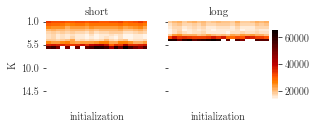

In [110]:
pt.plot_mse_sep(short_ktau01_seed, long_ktau01_seed, K_lst, seed)
print(pt.get_opt_K(short_ktau01_seed, K_lst, seed, mse=True))
print(pt.get_opt_K(long_ktau01_seed, K_lst, seed, mse=True))
plt.savefig('../report/figures/highI_params/mse1_seed60.svg', dpi=500, bbox_inches='tight')

In [111]:
np.mean(list(zip(*pt.get_opt_K(short_ktau01_seed, K_lst, seed, mse=True)))[1]), np.std(list(zip(*pt.get_opt_K(short_ktau01_seed, K_lst, seed,mse=True)))[1])

17 4.0
17 4.0


(3.880952380952381, 0.21295885499997996)

In [112]:
np.mean(list(zip(*pt.get_opt_K(long_ktau01_seed, K_lst, seed, mse=True)))[1]), np.std(list(zip(*pt.get_opt_K(long_ktau01_seed, K_lst, seed, mse=True)))[1])

0 2.5
0 2.5


(2.4761904761904763, 0.18747637795266214)